# **Task 1:  Data preprocessing**

# **Change point analysis**

In [6]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.7 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pymc as pm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# **Load dataset**

In [8]:
oil_price = pd.read_csv('/content/drive/MyDrive/change point analysis/data/BrentOilPrices.csv')
oil_price.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# **Data overview**

In [9]:
def data_overview(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    data_types = df.dtypes

    print(f"Number of rows:{num_rows}")
    print(f"Number of columns:{num_columns}")
    print(f"Data types of each column:\n{data_types}")

data_overview(oil_price)

Number of rows:9011
Number of columns:2
Data types of each column:
Date      object
Price    float64
dtype: object


# **Handling missing values**

In [10]:
#check missing values
oil_price.isnull().sum()

,0
Date,0
Price,0


In [11]:
#convert date to date format
oil_price['Date'] = pd.to_datetime(oil_price['Date'])

oil_price.head()

<ipython-input-11-e18a9b6e1820>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_price['Date'] = pd.to_datetime(oil_price['Date'])


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [12]:
#data summary
oil_price.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


# **Exploratory Data Analysis**

**Perform EDA to identify patterns, trends, and relationships in the data.**

# **1. Line plot**

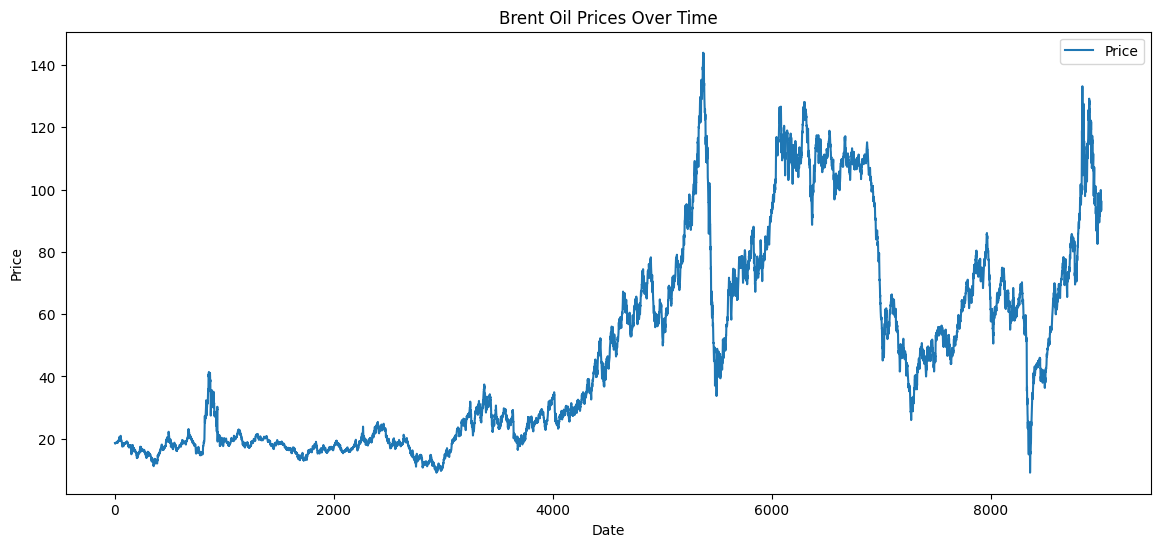

In [13]:
# Line plot
plt.figure(figsize=(14, 6))
plt.plot(oil_price['Price'], label='Price')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# **Seasonal plot**

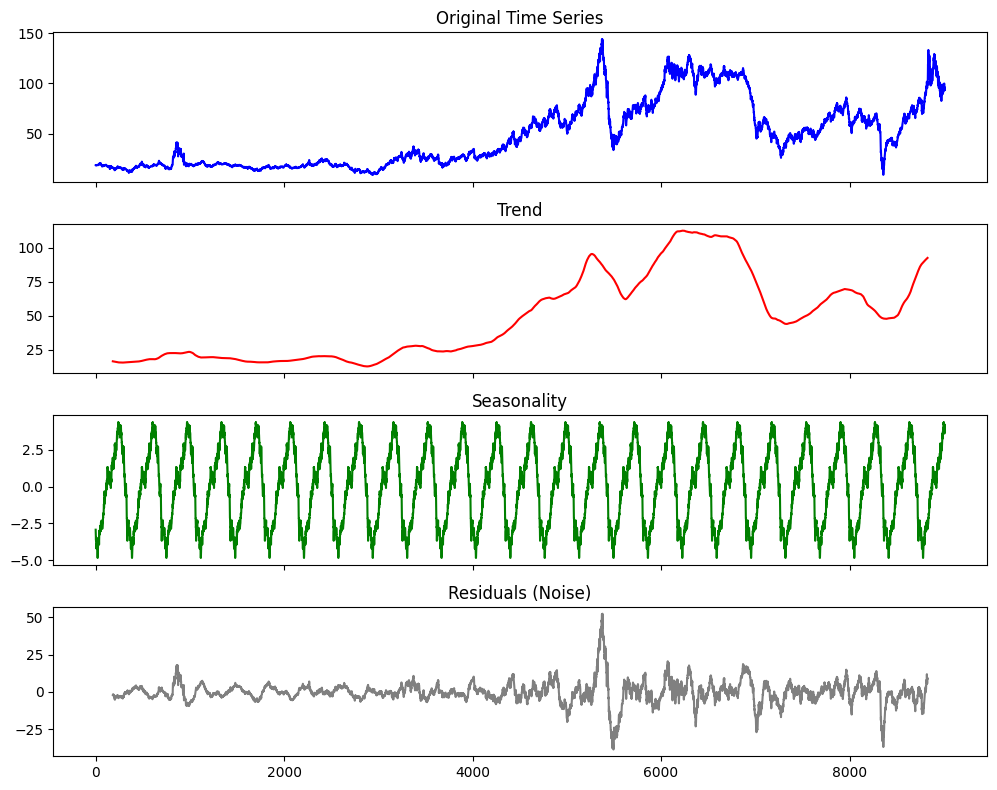

In [14]:
decomposition = seasonal_decompose(oil_price['Price'], model='additive', period=365)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Original Time Series', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend', color='red')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality', color='green')
decomposition.resid.plot(ax=axes[3], title='Residuals (Noise)', color='gray')

plt.tight_layout()
plt.show()

In [15]:
#save processed data
processed_data = oil_price.to_csv('/content/drive/MyDrive/change point analysis/data/processed_data.csv', index=False)